<a href="https://colab.research.google.com/github/everaldofaustino/projeto_final_semantix/blob/main/notebooks/An%C3%A1lise_microdados_ENEM_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introdução

1.1. ENEM

O Enem foi criado em 1998 como avaliação de desempenho dos estudantes de
escolas públicas e particulares do Ensino Médio. Porém, desde 2009, o Enem agregou outra função e tornou-se também uma avaliação que seleciona estudantes de todo o país para Instituições Federais de ensino superior e para programas de assistência do Governo Federal, como o Sistema de Seleção Unificada (Sisu), o Programa Universidade para Todos (Prouni) e o Programa do Fundo de Financiamento Estudantil (Fies). Esses programas visam pessoas que querem ingressar em universidades públicas ou que precisam de auxílio do governo para pagar a mensalidade da universidade particular.

A prova do Enem tem duração de dois dias e acontece todo ano, normalmente entre
o final de outubro e as primeiras semanas de novembro. O conteúdo avaliado no exame envolve todas as matérias dos três anos do ensino médio, organizadas em quatro áreas do conhecimento:



*   Matemática e suas Tecnologias
*   Ciências da Natureza e suas Tecnologias
*   Ciências Humanas e suas Tecnologias
*   Linguagens, Códigos e suas Tecnologias

O exame também é composto por uma redação em Língua Portuguesa, na qual os
participantes devem elaborar um texto dissertativo-argumentativo sobre o tema proposto.
Tal tema só é revelado na hora da prova e normalmente envolve um assunto importante ou polêmico da atualidade.

O portal do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira
(INEP), órgão vinculado ao Ministério da Educação (MEC), disponibiliza o acesso
aos dados das provas do Enem, organizados em forma de microdados para cada ano. Os
dados mais antigos disponíveis no portal são do Enem 1998. Os microdados possibilitam
a realização de análises, com auxílio de técnicas de mineração de dados, de forma a obter
padrões de desempenho de estudantes de todo o Brasil. Este trabalho pretende analisar
os dados do Enem aplicado no ano de 2021.

1.2 Objetivos

O objetivo principal deste trabalho é analisar os microdados do Enem aplicado em
2021, buscando fatores que influenciam no desempenho dos alunos, de forma a obter informações sobre a qualidade do ensino médio no Brasil e estatísticas de desempenho nas diferentes áreas de conhecimento.

Por meio da mineração de dados, é possível identificar padrões relacionados ao desempenho dos alunos, além de comparar os resultados das prova e realizar comparativos entre os alunos em diversas características diferentes.


#2. Importação das bibliotecas e Dataset





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 


In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


### Importar os dados para gerar o Data Frame:

In [4]:
microdados_Enem = pd.read_csv('/content/drive/MyDrive/Dados_ENEM/MICRODADOS_ENEM_2021.csv',sep=';',encoding = "cp1252",usecols=['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 
                          'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 
                          'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
                          'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
                          'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006','Q007','Q008','Q009','Q010','Q011','Q022', 'Q024', 'Q025'])

In [ ]:
microdados_Enem.head(100)

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,...,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q022,Q024,Q025
0,210053865474,5,F,1,1,3,1,NaN,0,NaN,...,3.0,D,A,B,C,B,A,B,B,B
1,210052384164,12,M,1,1,11,1,NaN,0,NaN,...,3.0,B,A,B,C,A,A,C,A,A
2,210052589243,13,F,3,1,15,1,NaN,0,NaN,...,3.0,C,A,B,B,A,A,C,B,B
3,210052128335,3,M,1,3,0,2,1.0,0,CE,...,6.0,B,A,B,C,A,A,B,B,B
4,210051353021,2,F,1,3,0,2,1.0,0,CE,...,4.0,C,A,B,C,A,A,E,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,210053186450,12,F,1,3,15,1,NaN,0,NaN,...,4.0,C,A,C,D,A,A,D,A,B
96,210052055613,3,M,1,3,0,2,1.0,0,NaN,...,3.0,B,A,C,C,A,A,D,B,B
97,210052107168,4,F,1,1,1,1,NaN,0,NaN,...,3.0,D,A,B,B,B,A,D,B,B
98,210051372963,5,F,1,3,3,1,NaN,0,NaN,...,4.0,D,A,B,C,A,A,C,A,A


In [ ]:
#Colunas disponíveis no dataset
microdados_Enem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

#Distribuição de Inscritos no Enem em Diferentes Classes da Amostra

##Gênero


In [ ]:
#Gênero
genero = microdados_Enem[["TP_SEXO"]]


In [ ]:
#Contagem dos gêneros na coluna TP_SEXO usando o método value_counts.
genero.value_counts()

TP_SEXO
F          2090526
M          1299306
dtype: int64

In [ ]:
matplotlib.rcParams.update({'font.size': 15})

In [ ]:
gender =round( (genero.groupby('TP_SEXO').size().sort_values(ascending=False) / genero.groupby('TP_SEXO').size().sort_values(ascending=False).sum())*100,2).reset_index(name='count')


In [ ]:
gender = (genero.groupby('TP_SEXO').size().sort_values(ascending=False).reset_index(name='count'))


In [ ]:
gender = gender.rename(columns={'F': 'Feminino', 'M': 'Masculino'})

In [ ]:
gender['TP_SEXO'] = gender['TP_SEXO'].replace(['F', 'M'], ['Feminino', 'Masculino'])
gender


,TP_SEXO,count
0,Feminino,2090526
1,Masculino,1299306


##Na amostra, foi verificado que 61.67% dos inscritos são do sexo feminino e 38.32% do sexo masculino.

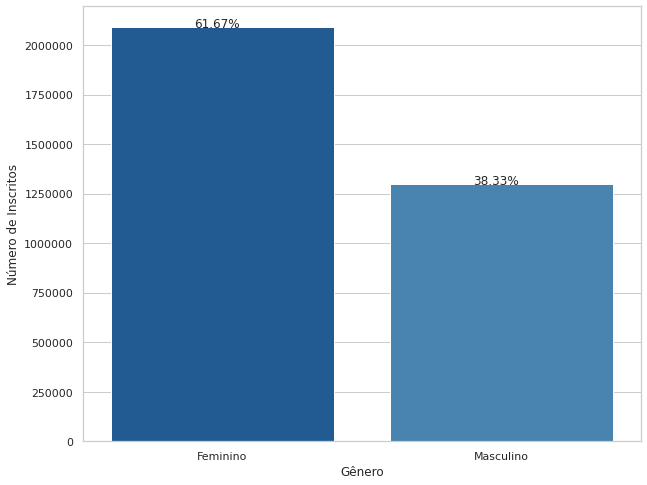

In [ ]:
sns.set(style="whitegrid",color_codes=True)
fig, ax= plt.subplots(figsize =(10,8))
palette = sns.color_palette("Blues",n_colors=5)
palette.reverse()
ax = sns.barplot(x='TP_SEXO', y='count',ax=ax, data=gender,palette=palette)
plt.ticklabel_format(style='plain', axis='y')

total = len(genero)
for p in ax.patches:
        percentage = '{:1.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() -0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

ax.set(ylabel='Número de Inscritos', xlabel='Gênero')        
        
plt.show()

##Raça

In [ ]:
#Raça
raca = microdados_Enem[["TP_COR_RACA"]]


In [ ]:
raca

,TP_COR_RACA
0,1
1,1
2,1
3,3
4,3
...,...
3389827,3
3389828,1
3389829,3
3389830,1


In [ ]:
raca=raca.replace({'TP_COR_RACA':{0:'nao_informado',1:'Branca',2:'Preta',3:'Parda',4:'Amarela',5:'Indígena',6:'Não dispõe da informação'}})

In [ ]:
raca.value_counts()

TP_COR_RACA             
Parda                       1457454
Branca                      1362256
Preta                        411302
nao_informado                 71149
Amarela                       68491
Indígena                      19175
Não dispõe da informação          5
dtype: int64

In [ ]:
raca = (raca.groupby('TP_COR_RACA').size().sort_values(ascending=False).reset_index(name='count'))


In [ ]:
#Contagem das raças no dataset
raca

,TP_COR_RACA,count
0,Parda,1457454
1,Branca,1362256
2,Preta,411302
3,nao_informado,71149
4,Amarela,68491
5,Indígena,19175
6,Não dispõe da informação,5


##Na amostra, foi verificado que 42,99% se declararam pardos, 40,19% brancos, 12,13% pretos, 2,02% amarelos e 0,57% indígenas e 2,10% não declararam cor ou raça. Nota-se a maioria de inscritos pardos e minoria de inscritos indígenas.

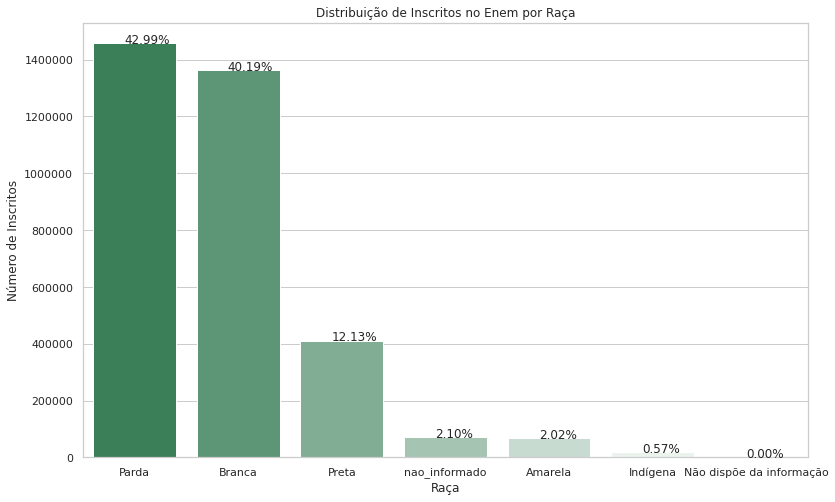

In [ ]:
sns.set(style="whitegrid",color_codes=True)
fig, ax= plt.subplots(figsize =(13,8))
palette = sns.light_palette("seagreen")
palette.reverse()
ax = sns.barplot(x='TP_COR_RACA', y='count',ax=ax, data=raca,palette=palette)
plt.ticklabel_format(style='plain', axis='y')

total = len(genero)
for p in ax.patches:
        percentage = '{:1.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() -0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

ax.set(ylabel='Número de Inscritos', xlabel='Raça',title='Distribuição de Inscritos no Enem por Raça')        
        
plt.show()

##Renda

In [8]:
renda1 = microdados_Enem[["Q006"]]

In [13]:
renda = (renda.groupby('Q006').size().sort_values(ascending=False).reset_index(name='count'))


In [11]:
renda2 = (renda.groupby('Q006').size().sort_values(ascending=False))

In [14]:
renda

,Q006,count
0,"Até R$ 1.100,00",932838
1,"De R\$ 1.100,01 até R$ 1.650,00.",575943
2,"De R\$ 1.650,01 - R$ 2.200,00.",432478
3,"De R\$ 2.750,01 até R$ 3.300,00.",233353
4,"De R\$ 2.200,01 - R$ 2.750,00.",209943
5,nao_informado,202114
6,"De R\$ 3.300,01 até R$ 4.400,00.",195709
7,"De R\$ 4.400,01 até R$ 5.500,00.",151384
8,"De R\$ 5.500,01 até R$ 6.600,00.",93898
9,"De R\$ 6.600,01 até R$ 7.700,00.",57492


In [9]:
renda=renda.replace({'Q006':{'A':'nao_informado','B':'Até R$ 1.100,00','C':'De R\$ 1.100,01 até R$ 1.650,00.','D':'De R\$ 1.650,01 - R$ 2.200,00.','E':'De R\$ 2.200,01 - R$ 2.750,00.','F':'De R\$ 2.750,01 até R$ 3.300,00.','G':'De R\$ 3.300,01 até R$ 4.400,00.',
                             'H':'De R\$ 4.400,01 até R$ 5.500,00.',
                             'I':'De R\$ 5.500,01 até R$ 6.600,00.','J':'De R\$ 6.600,01 até R$ 7.700,00.','K':'De R\$ 7.700,01  até  R$ 8.800,00.','L':'De R\$ 8.800,01 até R$ 9.900,00.',
                             'M':'De R\$ 9.900,01 até R$ 11.000,00.','N':'De R\$ 11.000,01 até R$ 13.200,00.','O':'De R\$ 13.200,01 até R$ 16.500,00.','P':'De R\$ 16.500,01 até R$ 22.000,00.','Q':'Acima de R$ 22.000,00.'}})

In [ ]:
def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    '''Returns a seaborn palette reordered by value
    Parameters:
    values: pd.Series
    palette_name:str, Seaborn valid palette name
    ascending: bool, optional color sort order
    '''
    # convert to indices
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[0]).index
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [ ]:
rank = renda2.argsort().argsort()

In [ ]:
rank

Q006
Acima de R$ 22.000,00.                 0
De R\$ 3.300,01 até R$ 4.400,00.      14
De R\$ 9.900,01 até R$ 11.000,00.     13
De R\$ 8.800,01 até R$ 9.900,00.      12
De R\$ 7.700,01  até  R$ 8.800,00.    11
De R\$ 6.600,01 até R$ 7.700,00.      10
De R\$ 5.500,01 até R$ 6.600,00.       9
De R\$ 4.400,01 até R$ 5.500,00.      15
De R\$ 2.750,01 até R$ 3.300,00.       8
Até R$ 1.100,00                        6
De R\$ 2.200,01 - R$ 2.750,00.         5
De R\$ 16.500,01 até R$ 22.000,00.     4
De R\$ 13.200,01 até R$ 16.500,00.     3
De R\$ 11.000,01 até R$ 13.200,00.     2
De R\$ 1.650,01 - R$ 2.200,00.         1
De R\$ 1.100,01 até R$ 1.650,00.       7
nao_informado                         16
dtype: int64

##A faixa de renda de até R$ 1.100,00 foi a que apresentou o maior percentual de inscritos,conforme visto no gráfico abaixo.

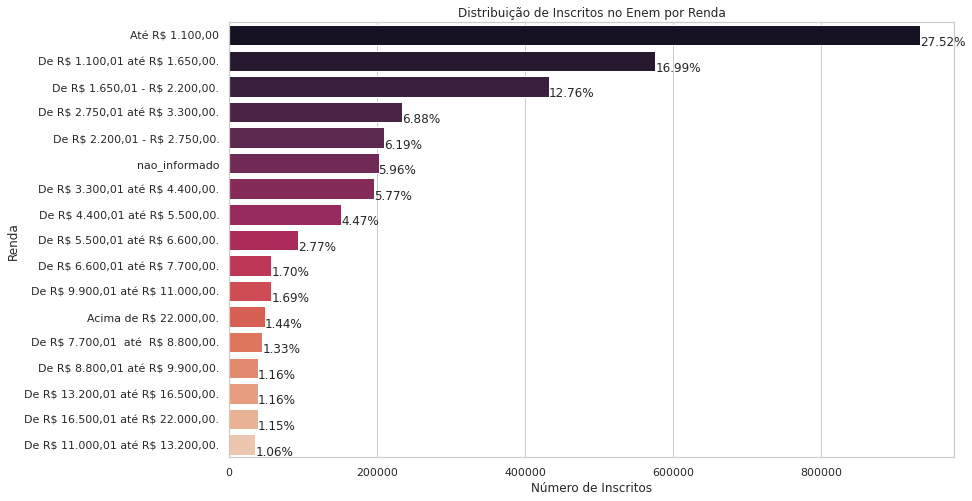

In [16]:
from array import array
sns.set(style="whitegrid",color_codes=True)
fig, ax= plt.subplots(figsize =(13,8))
palette = sns.color_palette("rocket", 18)
#palette.reverse()

#pal = sns.color_palette("YlOrRd", len(renda1))
#rank = renda2.argsort().argsort()  
ax = sns.barplot(x='count', y='Q006',ax=ax, data=renda,palette=palette)
plt.ticklabel_format(style='plain', axis='x')

total = len(renda1)
for p in ax.patches:
        percentage = '{:1.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() -0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

ax.set(xlabel='Número de Inscritos', ylabel='Renda',title='Distribuição de Inscritos no Enem por Renda')        
        
plt.show()

#Tipo de Escola do Ensino Médio

In [ ]:
tipo_escola = microdados_Enem[["TP_ESCOLA"]]

In [ ]:
tipo_escola 

,TP_ESCOLA
0,nao_respondeu
1,nao_respondeu
2,nao_respondeu
3,Pública
4,Pública
...,...
3389827,nao_respondeu
3389828,nao_respondeu
3389829,nao_respondeu
3389830,nao_respondeu


In [ ]:
#Limpeza de dados nulos
#tipo_escola=tipo_escola.dropna()

In [ ]:
tipo_escola=tipo_escola.replace({'TP_ESCOLA':{1:'nao_respondeu',2:'Pública',3:'Privada'}})

In [ ]:
tipo_escola1= ((tipo_escola.groupby('TP_ESCOLA').size().sort_values(ascending=False).reset_index(name='count')))

In [ ]:
tipo_escola1

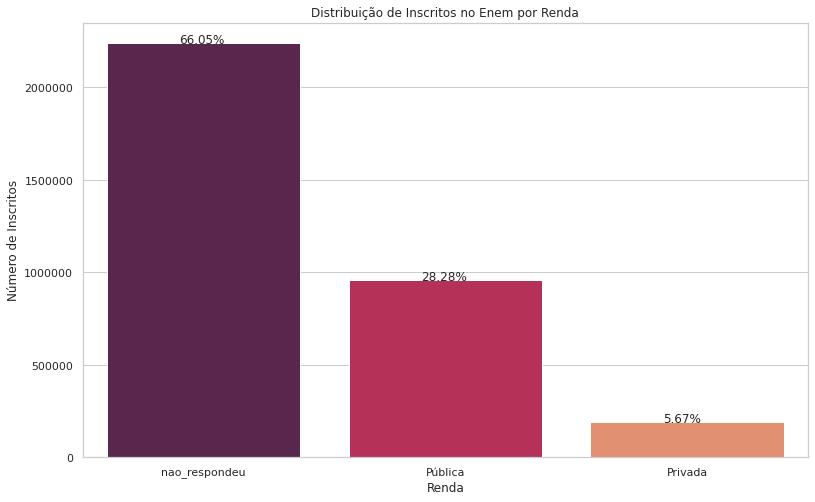

In [ ]:
from array import array
sns.set(style="whitegrid",color_codes=True)
fig, ax= plt.subplots(figsize =(13,8))
palette = sns.color_palette("rocket", 3)
#palette.reverse()

#pal = sns.color_palette("YlOrRd", len(renda1))
#rank = renda2.argsort().argsort()  
ax = sns.barplot(y='count', x='TP_ESCOLA',ax=ax, data=tipo_escola1,palette=palette)
plt.ticklabel_format(style='plain', axis='y')

total = len(tipo_escola)
for p in ax.patches:
        percentage = '{:1.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() -0.5
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))

ax.set(ylabel='Número de Inscritos', xlabel='Renda',title='Distribuição de Inscritos no Enem por Renda')        
        
plt.show()

# Estatísticas de Notas da Amostra

In [ ]:
def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

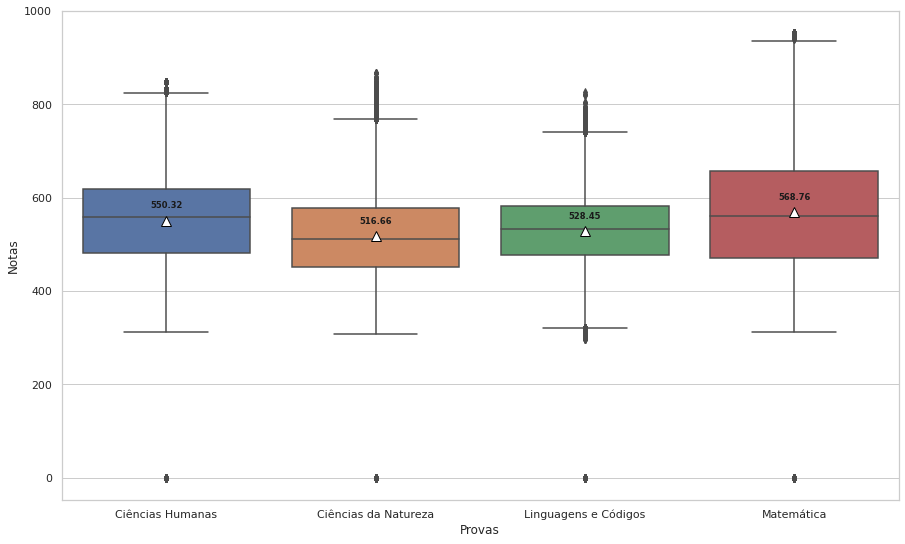

In [ ]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats

df = microdados_Enem_filtrado_branca[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
fig, ax = plt.subplots(figsize=(15, 9))


box_plot= sns.boxplot(x="variable", y="value", data=pd.melt(df),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
 
medians = round(pd.melt(df).groupby(['variable'])['value'].mean(),2)
vertical_offset = pd.melt(df)['value'].mean() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='k',weight='semibold')
box_plot.set(ylabel='Notas', xlabel='Provas')

plt.show()




In [ ]:
medians

variable
Ciências Humanas        550.32
Ciências da Natureza    516.66
Linguagens e Códigos    528.45
Matemática              568.76
Name: value, dtype: float64

In [ ]:
 microdados_Enem_filtrado[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT']]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
1,580.7,678.9,638.9,659.5
2,497.7,532.4,457.6,582.6
24,414.6,410.1,386.7,423.0
34,476.8,608.5,534.2,570.2
38,433.4,622.0,548.3,579.4
...,...,...,...,...
1822049,416.9,500.4,469.2,380.3
1822204,553.8,576.6,532.0,499.1
1822429,362.4,379.0,525.9,389.0
1822462,360.3,375.3,470.2,407.3


#Distribuição das Notas dos Inscritos na Amostra

In [ ]:
#microdados_Enem_filtrado = microdados_Enem.dropna()

In [ ]:
#Renomear Colunas

enem_provas=microdados_Enem.rename(columns = {'NU_NOTA_CN':'Ciências da Natureza','NU_NOTA_CH': 'Ciências Humanas', 'NU_NOTA_LC':'Linguagens e Códigos','NU_NOTA_MT':'Matemática' })

In [ ]:
enem_provas = enem_provas[['Ciências Humanas','Ciências da Natureza','Linguagens e Códigos','Matemática']]

In [ ]:
enem_provas.columns

Index(['Ciências Humanas', 'Ciências da Natureza', 'Linguagens e Códigos',
       'Matemática'],
      dtype='object')

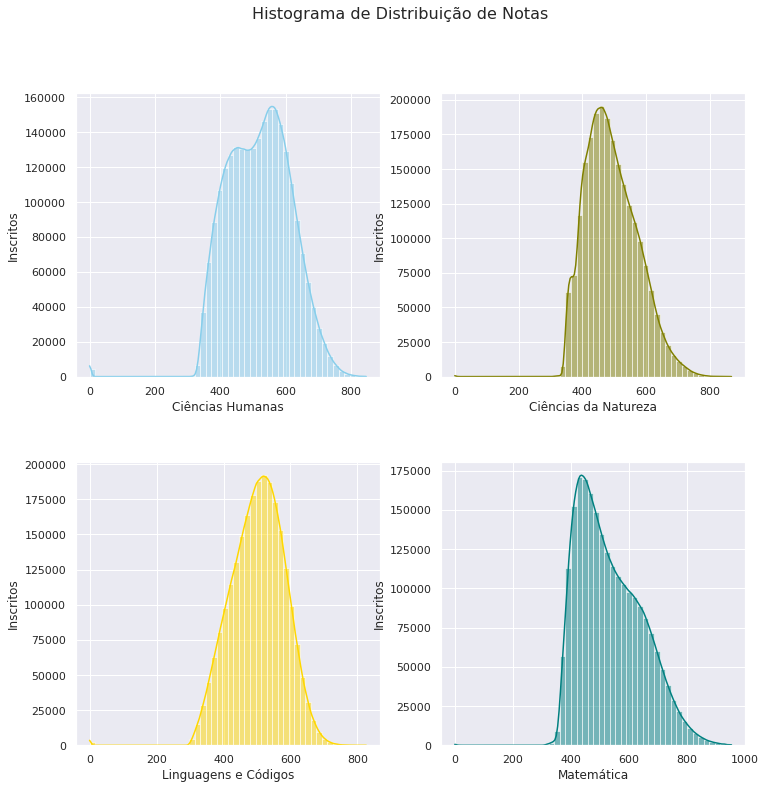

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(data= enem_provas, x= 'Ciências Humanas', kde=True, color="skyblue",bins =50, ax=axs[0, 0]).set(ylabel = 'Inscritos')
sns.histplot(data=enem_provas, x="Ciências da Natureza", kde=True, color="olive",bins =50, ax=axs[0, 1]).set(ylabel = 'Inscritos')
sns.histplot(data=enem_provas, x="Linguagens e Códigos", kde=True, color="gold",bins =50, ax=axs[1, 0]).set(ylabel = 'Inscritos')
sns.histplot(data=enem_provas, x="Matemática", kde=True, color="teal",bins =50, ax=axs[1, 1]).set(ylabel = 'Inscritos')

fig.suptitle('Histograma de Distribuição de Notas', fontsize=16)
plt.subplots_adjust(hspace = 0.3)

plt.show()



# Estatísticas das Notas por Gênero, Cor/Raça, Renda e Tipo de escola

##Gênero

###Masculino

In [ ]:

microdados_Enem_filtrado_Masculino = microdados_Enem[(microdados_Enem['TP_SEXO'] == 'M')&(microdados_Enem['IN_TREINEIRO'] == 0) & (microdados_Enem ['TP_PRESENCA_CN'] == 1) & (microdados_Enem['TP_PRESENCA_CH'] == 1) & (microdados_Enem['TP_PRESENCA_LC'] == 1) & (microdados_Enem['TP_PRESENCA_MT'] == 1) & (microdados_Enem['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
microdados_Enem_filtrado = microdados_Enem_filtrado_Masculino.dropna()

In [ ]:
enem_masculino=microdados_Enem_filtrado_Masculino.rename(columns = {'NU_NOTA_CN':'Ciências da Natureza','NU_NOTA_CH': 'Ciências Humanas', 'NU_NOTA_LC':'Linguagens e Códigos','NU_NOTA_MT':'Matemática' })

In [ ]:
df = enem_masculino[['Ciências Humanas','Ciências da Natureza','Linguagens e Códigos','Matemática']]

In [ ]:
df.describe()

,Ciências Humanas,Ciências da Natureza,Linguagens e Códigos,Matemática
count,708056.000000,708056.000000,708056.000000,708056.000000
mean,538.778320,509.089573,512.588772,561.695188
std,97.927297,85.069287,78.577613,117.581879
min,0.000000,0.000000,0.000000,0.000000
25%,462.000000,444.000000,457.600000,463.200000
50%,545.700000,502.800000,517.000000,550.700000
75%,610.200000,568.800000,569.400000,649.000000
max,846.900000,867.100000,813.200000,953.100000


In [ ]:
df

,Ciências Humanas,Ciências da Natureza,Linguagens e Códigos,Matemática
0,551.8,505.9,498.3,461.5
1,678.9,580.7,638.9,659.5
2,476.5,537.6,553.2,509.7
3,524.3,516.3,496.3,608.5
4,602.0,388.1,337.1,629.5
...,...,...,...,...
708051,441.9,323.1,398.2,405.8
708052,553.0,458.6,547.6,444.4
708053,638.4,568.4,567.4,615.8
708054,531.2,435.6,534.7,399.2


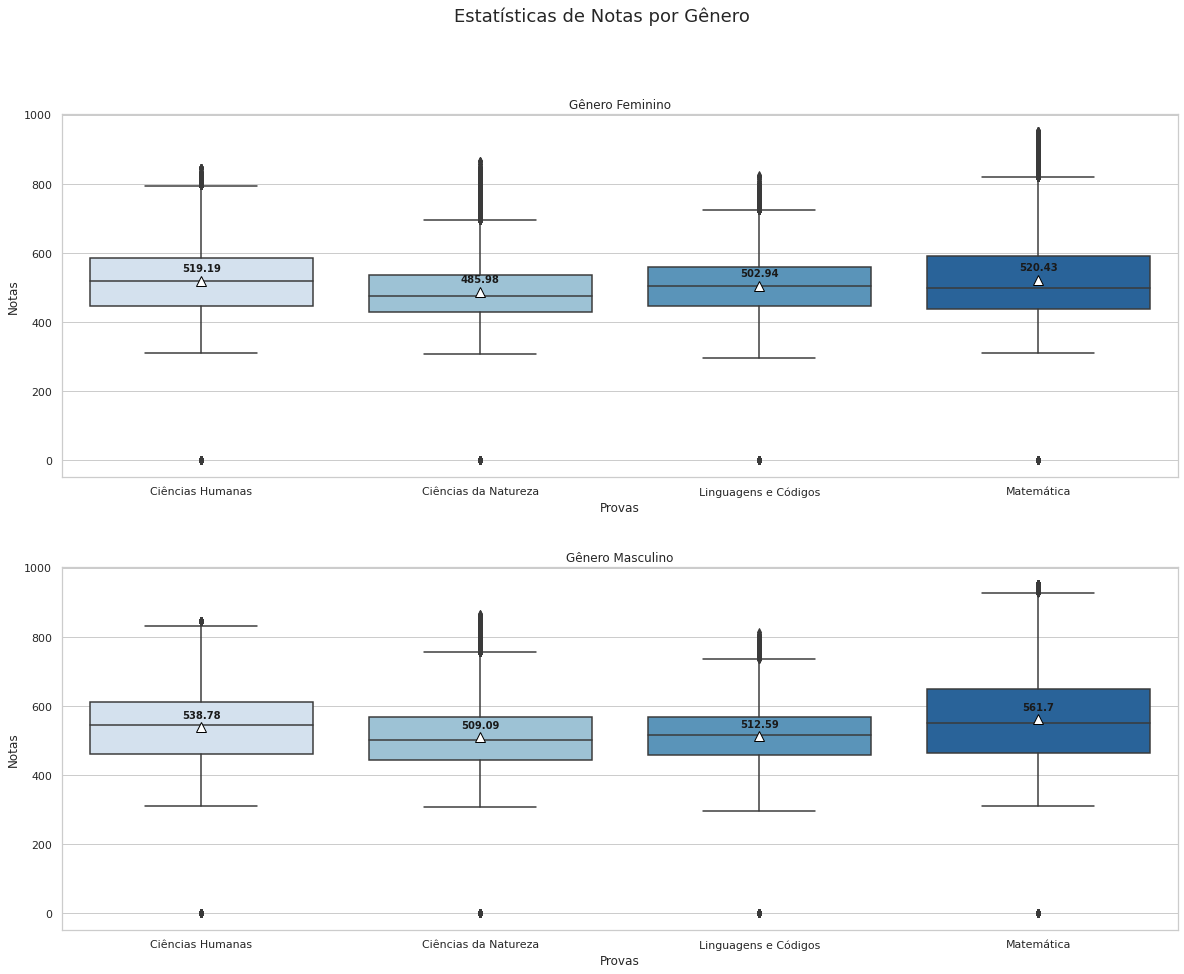

In [ ]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats

sns.set(style="whitegrid",color_codes=True)

#df = microdados_Enem_filtrado_branca[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
fig, ax = plt.subplots(2,1,figsize=(20, 15))
fig.suptitle('Estatísticas de Notas por Gênero', fontsize=18)


box_plot= sns.boxplot(x="variable", y="value", data=pd.melt(df),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Blues",ax=ax[1])

medians = round(pd.melt(df).groupby(['variable'])['value'].mean(),2)
vertical_offset = pd.melt(df)['value'].mean() * 0.05 # offset from median for display



for xtick in box_plot.get_xticks():
   box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='k',weight='semibold')
box_plot.set(ylabel='Notas', xlabel='Provas',title = 'Gênero Masculino')


box_plot1= sns.boxplot(x="variable", y="value", data=pd.melt(enem_feminino ),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Blues",ax=ax[0])


medians1 = round(pd.melt(enem_feminino).groupby(['variable'])['value'].mean(),2)
vertical_offset1 = pd.melt(enem_feminino)['value'].mean() * (2.64) # offset from median for display



for xtick1 in box_plot1.get_xticks():
    box_plot.text(xtick1,medians1[xtick1] + vertical_offset1,medians1[xtick1], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot1.set(ylabel='Notas', xlabel='Provas',title = 'Gênero Feminino')

plt.subplots_adjust(hspace = 0.25)


 
#medians = round(pd.melt(df).groupby(['variable'])['value'].mean(),2)
#vertical_offset = pd.melt(df)['value'].mean() * 0.05 # offset from median for display

#for xtick in box_plot.get_xticks():
   # box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
           # horizontalalignment='center',size='x-small',color='k',weight='semibold')
#box_plot.set(ylabel='Notas', xlabel='Provas',title = 'Estatísticas das Notas por Gênero Masculino')

plt.show()




###Feminino

In [ ]:

microdados_Enem_filtrado_feminino = microdados_Enem[(microdados_Enem['TP_SEXO'] == 'F')&(microdados_Enem['IN_TREINEIRO'] == 0) & (microdados_Enem ['TP_PRESENCA_CN'] == 1) & (microdados_Enem['TP_PRESENCA_CH'] == 1) & (microdados_Enem['TP_PRESENCA_LC'] == 1) & (microdados_Enem['TP_PRESENCA_MT'] == 1) & (microdados_Enem['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
#microdados_Enem_filtrado = microdados_Enem_filtrado_feminino.dropna()

In [ ]:
enem_feminino=microdados_Enem_filtrado_feminino.rename(columns = {'NU_NOTA_CN':'Ciências da Natureza','NU_NOTA_CH': 'Ciências Humanas', 'NU_NOTA_LC':'Linguagens e Códigos','NU_NOTA_MT':'Matemática' })

In [ ]:
enem_feminino = enem_feminino[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]

###Gráfico Box-Plot

#Raça

In [ ]:

microdados_Enem_filtrado_branca = microdados_Enem[(microdados_Enem['TP_COR_RACA'] == 'Branca')&(microdados_Enem['IN_TREINEIRO'] == 0) & (microdados_Enem ['TP_PRESENCA_CN'] == 1) & (microdados_Enem['TP_PRESENCA_CH'] == 1) & (microdados_Enem['TP_PRESENCA_LC'] == 1) & (microdados_Enem['TP_PRESENCA_MT'] == 1) & (microdados_Enem['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
raca = ['Branca','Preta','Parda','Amarela','Indígena']


In [ ]:
def raca(name,name2):
  microdados_Enem_filtrado_name = microdados_Enem[(microdados_Enem['TP_COR_RACA'] == name2 )&(microdados_Enem['IN_TREINEIRO'] == 0) & (microdados_Enem ['TP_PRESENCA_CN'] == 1) & (microdados_Enem['TP_PRESENCA_CH'] == 1) & (microdados_Enem['TP_PRESENCA_LC'] == 1) & (microdados_Enem['TP_PRESENCA_MT'] == 1) & (microdados_Enem['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)
 #microdados_Enem_name = microdados_Enem_filtrado_name .dropna()
  microdados_Enem_filtrado_name=microdados_Enem_filtrado_name.rename(columns = {'NU_NOTA_CH': 'Ciências Humanas','NU_NOTA_CN':'Ciências da Natureza', 'NU_NOTA_LC':'Linguagens e Códigos','NU_NOTA_MT':'Matemática' })
  microdados_Enem_filtrado_name = microdados_Enem_filtrado_name[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
  return microdados_Enem_filtrado_name

In [ ]:
microdados_Enem_filtrado_branca = microdados_Enem[(microdados_Enem['TP_COR_RACA'] == 'Branca')&(microdados_Enem['IN_TREINEIRO'] == 0) & (microdados_Enem ['TP_PRESENCA_CN'] == 1) & (microdados_Enem['TP_PRESENCA_CH'] == 1) & (microdados_Enem['TP_PRESENCA_LC'] == 1) & (microdados_Enem['TP_PRESENCA_MT'] == 1) & (microdados_Enem['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


##Branca

In [ ]:
microdados_Enem_filtrado_branca = raca('branca',1)
microdados_Enem_filtrado_branca

,Ciências Humanas,Ciências da Natureza,Linguagens e Códigos,Matemática
0,551.8,505.9,498.3,461.5
1,502.7,378.5,487.7,514.9
2,419.9,487.9,488.2,553.1
3,592.5,530.0,516.2,583.0
4,541.5,531.9,511.2,411.5
...,...,...,...,...
766763,430.2,437.3,455.3,355.3
766764,553.0,458.6,547.6,444.4
766765,405.2,506.0,416.3,450.4
766766,605.6,576.9,631.0,678.0


##Preta

In [ ]:
 microdados_Enem_filtrado_preta = raca('preta',2)

In [ ]:
type( microdados_Enem_filtrado_preta )

pandas.core.frame.DataFrame

In [ ]:
microdados_Enem_filtrado_preta

,Ciências Humanas,Ciências da Natureza,Linguagens e Códigos,Matemática
0,619.5,548.1,676.3,386.6
1,613.1,465.2,522.1,579.6
2,572.8,594.4,536.6,469.6
3,451.0,396.6,430.6,450.4
4,455.7,394.7,431.0,386.4
...,...,...,...,...
214395,481.1,526.1,496.3,553.5
214396,612.7,429.8,591.2,606.3
214397,448.4,485.4,491.4,372.1
214398,528.8,395.1,505.1,582.4


##Parda

In [ ]:
microdados_Enem_filtrado_parda = raca('parda',3)

##Amarela

In [ ]:
microdados_Enem_filtrado_amarela = raca('amarela',4)

In [ ]:
type(microdados_Enem_filtrado_amarela)

pandas.core.frame.DataFrame

##Indígena

In [ ]:
microdados_Enem_filtrado_indigena = raca('indigena',5)

##Boxplot

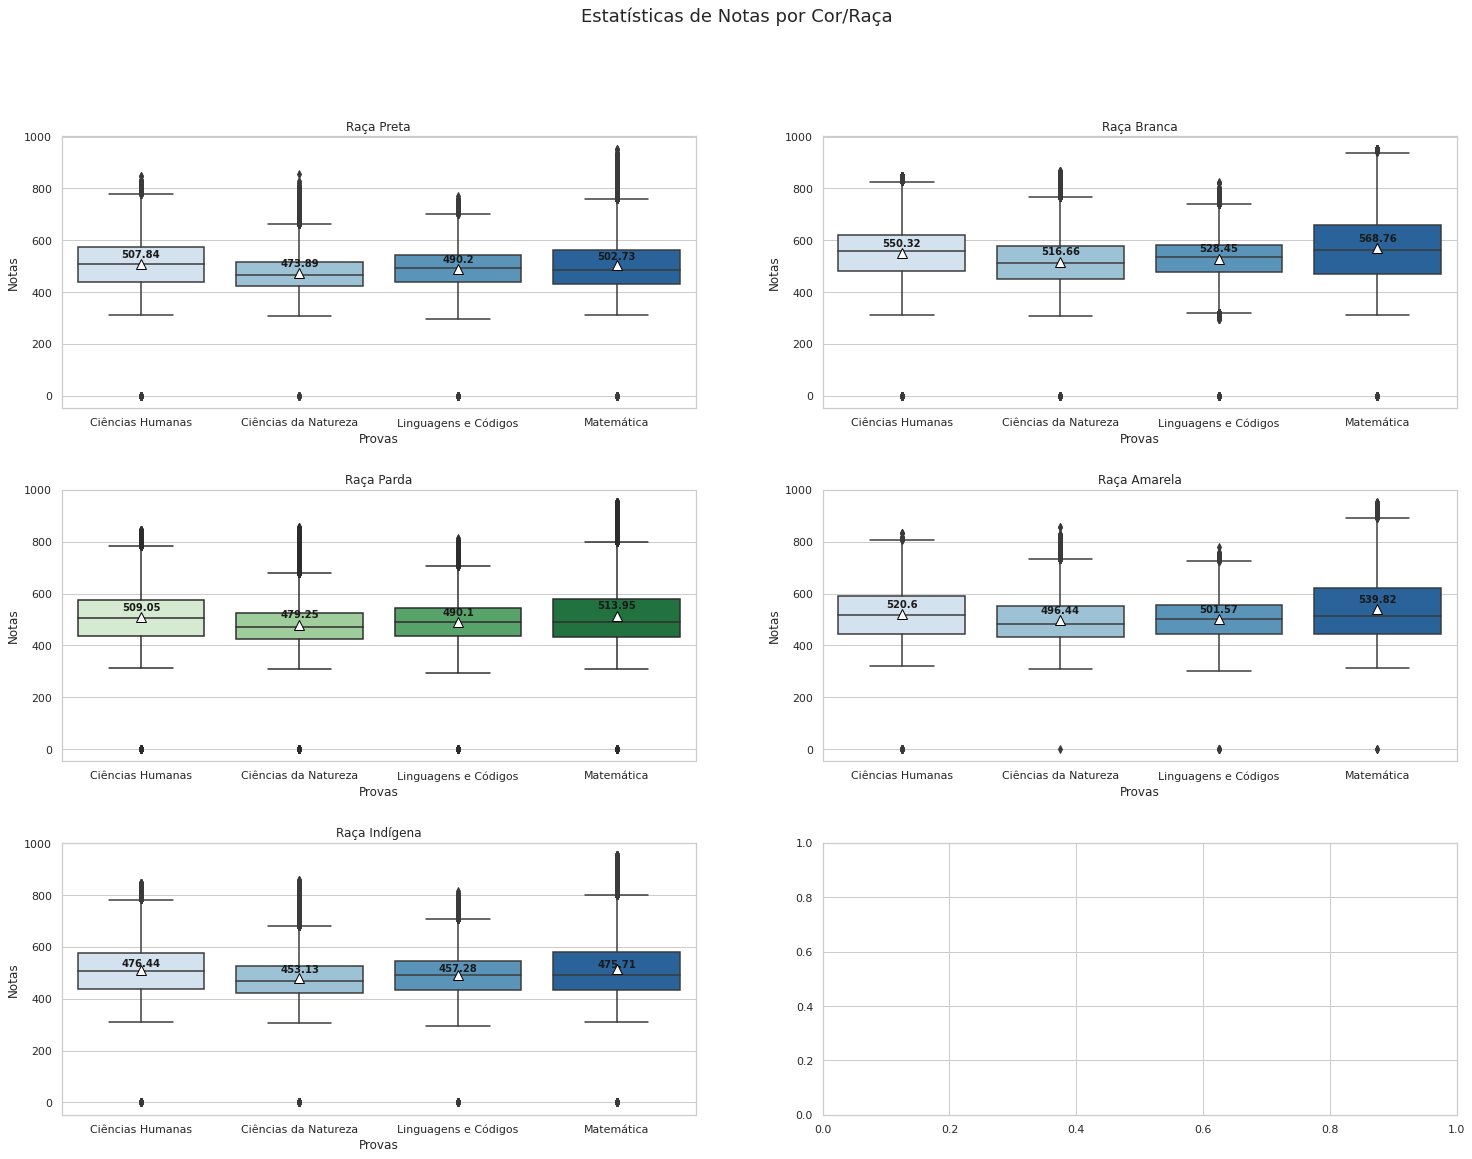

In [ ]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats

sns.set(style="whitegrid",color_codes=True)

#df = microdados_Enem_filtrado_branca[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
fig, ax = plt.subplots(3,2,figsize=(25, 18))
fig.suptitle('Estatísticas de Notas por Cor/Raça', fontsize=18)

#Raça Preta
box_plot= sns.boxplot(x="variable", y="value", data=pd.melt(microdados_Enem_filtrado_preta),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Blues",ax=ax[0,0])

medians = round(pd.melt(microdados_Enem_filtrado_preta).groupby(['variable'])['value'].mean(),2)
vertical_offset = pd.melt(microdados_Enem_filtrado_preta)['value'].mean() * 0.05 # offset from median for display



for xtick in box_plot.get_xticks():
   box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='k',weight='semibold')
box_plot.set(ylabel='Notas', xlabel='Provas',title = 'Raça Preta')

# Raça Branca
box_plot1= sns.boxplot(x="variable", y="value", data=pd.melt(microdados_Enem_filtrado_branca),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Blues",ax=ax[0,1])


medians1 = round(pd.melt(microdados_Enem_filtrado_branca).groupby(['variable'])['value'].mean(),2)
vertical_offset1 = pd.melt(microdados_Enem_filtrado_branca)['value'].mean() * (0.05) # offset from median for display



for xtick1 in box_plot1.get_xticks():
    box_plot1.text(xtick1,medians1[xtick1] + vertical_offset1,medians1[xtick1], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot1.set(ylabel='Notas', xlabel='Provas',title = 'Raça Branca')


# Raça Parda
box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(microdados_Enem_filtrado_parda),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Greens",ax=ax[1,0])


medians2 = round(pd.melt(microdados_Enem_filtrado_parda).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(microdados_Enem_filtrado_parda)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'Raça Parda')


# Raça Amarela
box_plot3= sns.boxplot(x="variable", y="value", data=pd.melt(microdados_Enem_filtrado_amarela),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Blues",ax=ax[1,1])


medians3 = round(pd.melt(microdados_Enem_filtrado_amarela).groupby(['variable'])['value'].mean(),2)
vertical_offset3 = pd.melt(microdados_Enem_filtrado_amarela)['value'].mean() * (1.05) # offset from median for display



for xtick3 in box_plot3.get_xticks():
    box_plot3.text(xtick3,medians3[xtick3] + vertical_offset1,medians3[xtick3], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot3.set(ylabel='Notas', xlabel='Provas',title = 'Raça Amarela')

# Raça Indígena
box_plot4= sns.boxplot(x="variable", y="value", data=pd.melt(microdados_Enem_filtrado_parda),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Blues",ax=ax[2,0])


medians4 = round(pd.melt(microdados_Enem_filtrado_indigena).groupby(['variable'])['value'].mean(),2)
vertical_offset4 = pd.melt(microdados_Enem_filtrado_indigena)['value'].mean() * (0.1) # offset from median for display



for xtick4 in box_plot4.get_xticks():
    box_plot4.text(xtick4,medians4[xtick4] + vertical_offset4,medians4[xtick4], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot4.set(ylabel='Notas', xlabel='Provas',title = 'Raça Indígena')







plt.subplots_adjust(hspace = 0.3)


 
#medians = round(pd.melt(df).groupby(['variable'])['value'].mean(),2)
#vertical_offset = pd.melt(df)['value'].mean() * 0.05 # offset from median for display

#for xtick in box_plot.get_xticks():
   # box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
           # horizontalalignment='center',size='x-small',color='k',weight='semibold')
#box_plot.set(ylabel='Notas', xlabel='Provas',title = 'Estatísticas das Notas por Gênero Masculino')

plt.show()




In [ ]:
microdados_Enem_filtrado_indigena.describe()

,Ciências Humanas,Ciências da Natureza,Linguagens e Códigos,Matemática
count,8856.000000,8856.000000,8856.000000,8856.000000
mean,476.443451,453.130601,457.284327,475.710840
std,82.063875,63.810915,71.652096,81.481574
min,0.000000,311.600000,0.000000,0.000000
25%,414.100000,405.400000,402.800000,414.900000
50%,467.350000,444.300000,454.500000,457.600000
75%,533.325000,491.300000,508.500000,517.625000
max,808.200000,748.600000,708.300000,905.800000


In [ ]:
def test(name):
  import plotly.graph_objects as go

  fig = go.Figure()

  for col in microdados_Enem_filtrado_name:
    fig.add_trace(go.Box(y=microdados_Enem_filtrado_name[col].values, name=microdados_Enem_filtrado_name[col].name))
  fig.show()  
  return 

# Estatísticas de notas nas faixas de renda.

In [ ]:
renda1 = microdados_Enem[["Q006"]]

In [ ]:
renda = microdados_Enem.rename(columns = {'NU_NOTA_CH': 'Ciências Humanas','NU_NOTA_CN':'Ciências da Natureza', 'NU_NOTA_LC':'Linguagens e Códigos','NU_NOTA_MT':'Matemática' })


In [ ]:
renda

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,...,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q022,Q024,Q025
0,210053865474,5,F,1,1,3,1,NaN,0,NaN,...,3.0,D,A,B,C,B,A,B,B,B
1,210052384164,12,M,1,1,11,1,NaN,0,NaN,...,3.0,B,A,B,C,A,A,C,A,A
2,210052589243,13,F,3,1,15,1,NaN,0,NaN,...,3.0,C,A,B,B,A,A,C,B,B
3,210052128335,3,M,1,3,0,2,1.0,0,CE,...,6.0,B,A,B,C,A,A,B,B,B
4,210051353021,2,F,1,3,0,2,1.0,0,CE,...,4.0,C,A,B,C,A,A,E,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,7,F,1,3,0,1,NaN,0,NaN,...,5.0,C,C,B,C,A,B,B,A,B
3389828,210053776013,7,F,1,1,5,1,NaN,0,NaN,...,4.0,G,A,C,E,C,A,E,B,B
3389829,210052441508,13,F,1,3,15,1,NaN,0,NaN,...,1.0,F,A,B,B,A,A,B,B,B
3389830,210051139675,7,F,1,1,4,1,NaN,0,NaN,...,4.0,E,A,B,C,C,A,E,C,B


In [ ]:
renda=renda.replace({'Q006':{'A':'nao_informado','B':'Até R$ 1.100,00','C':'De R\$ 1.100,01 até R$ 1.650,00.','D':'De R\$ 1.650,01 - R$ 2.200,00.','E':'De R\$ 2.200,01 - R$ 2.750,00.','F':'De R\$ 2.750,01 até R$ 3.300,00.','G':'De R\$ 3.300,01 até R$ 4.400,00.',
                             'H':'De R\$ 4.400,01 até R$ 5.500,00.',
                             'I':'De R\$ 5.500,01 até R$ 6.600,00.','J':'De R\$ 6.600,01 até R$ 7.700,00.','K':'De R\$ 7.700,01  até  R$ 8.800,00.','L':'De R\$ 8.800,01 até R$ 9.900,00.',
                             'M':'De R\$ 9.900,01 até R$ 11.000,00.','N':'De R\$ 11.000,01 até R$ 13.200,00.','O':'De R\$ 13.200,01 até R$ 16.500,00.','P':'De R\$ 16.500,01 até R$ 22.000,00.','Q':'Acima de R$ 22.000,00.'}})

In [ ]:
renda

In [ ]:

A = renda[(renda['Q006'] == 'nao_informado')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:

B = renda[(renda['Q006'] == 'Até R$ 1.100,00')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:

C = renda[(renda['Q006'] == 'De R\$ 1.100,01 até R$ 1.650,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
D = renda[(renda['Q006'] == 'De R\$ 1.650,01 - R$ 2.200,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
E = renda[(renda['Q006'] == 'De R\$ 2.200,01 - R$ 2.750,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
F = renda[(renda['Q006'] == 'De R\$ 2.750,01 até R$ 3.300,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


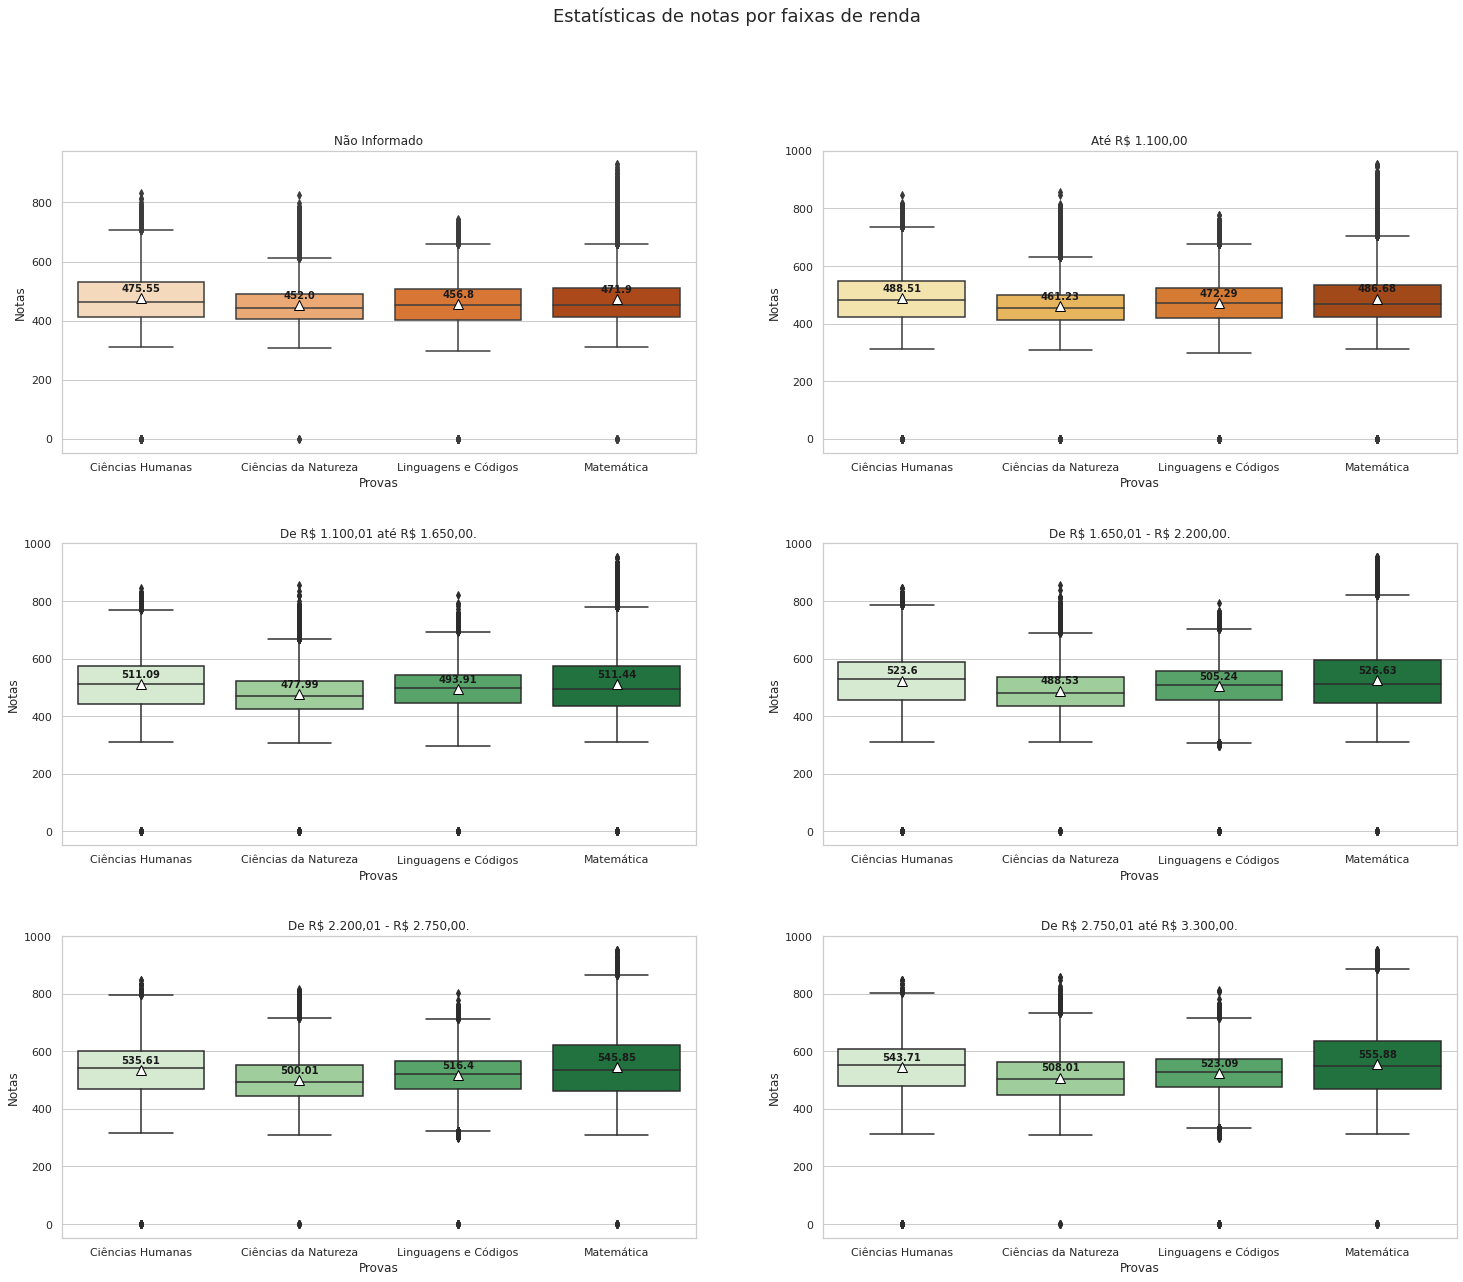

In [ ]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats

sns.set(style="whitegrid",color_codes=True)

df_A = A[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_B = B[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_C = C[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_D = D[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_E = E[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_F = F[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]



fig, ax = plt.subplots(3,2,figsize=(25, 20))
fig.suptitle('Estatísticas de notas por faixas de renda', fontsize=18)

#nao_informado
box_plot= sns.boxplot(x="variable", y="value", data=pd.melt(df_A),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Oranges",ax=ax[0,0])

medians = round(pd.melt(df_A).groupby(['variable'])['value'].mean(),2)
vertical_offset = pd.melt(df_A)['value'].mean() * 0.05 # offset from median for display



for xtick in box_plot.get_xticks():
   box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='k',weight='semibold')
box_plot.set(ylabel='Notas', xlabel='Provas',title = 'Não Informado')

# Até R$ 1.100,00
box_plot1= sns.boxplot(x="variable", y="value", data=pd.melt(df_B),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="YlOrBr",ax=ax[0,1])


medians1 = round(pd.melt(df_B).groupby(['variable'])['value'].mean(),2)
vertical_offset1 = pd.melt(df_B)['value'].mean() * (0.05) # offset from median for display



for xtick1 in box_plot1.get_xticks():
    box_plot1.text(xtick1,medians1[xtick1] + vertical_offset1,medians1[xtick1], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot1.set(ylabel='Notas', xlabel='Provas',title = 'Até R$ 1.100,00')


# De R\$ 1.100,01 até R$ 1.650,00.
box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_C),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Greens",ax=ax[1,0])


medians2 = round(pd.melt(df_C).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_C)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 1.100,01 até R$ 1.650,00.')

#De R\$ 1.650,01 - R$ 2.200,00.

box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_D),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Greens",ax=ax[1,1])


medians2 = round(pd.melt(df_D).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_D)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 1.650,01 - R$ 2.200,00.')

#De R\$ 2.200,01 - R$ 2.750,00.

box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_E),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Greens",ax=ax[2,0])


medians2 = round(pd.melt(df_E).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_E)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 2.200,01 - R$ 2.750,00.')


#De R\$ 2.750,01 até R$ 3.300,00.

box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_F),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Greens",ax=ax[2,1])


medians2 = round(pd.melt(df_F).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_F)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 2.750,01 até R$ 3.300,00.')



plt.subplots_adjust(hspace = 0.3)


 


plt.show()


In [ ]:

G = renda[(renda['Q006'] == 'De R\$ 3.300,01 até R$ 4.400,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:

H = renda[(renda['Q006'] == 'De R\$ 4.400,01 até R$ 5.500,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
I = renda[(renda['Q006'] == 'De R\$ 5.500,01 até R$ 6.600,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
J = renda[(renda['Q006'] == 'De R\$ 6.600,01 até R$ 7.700,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
K = renda[(renda['Q006'] == 'De R\$ 7.700,01  até  R$ 8.800,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
L = renda[(renda['Q006'] == 'De R\$ 8.800,01 até R$ 9.900,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


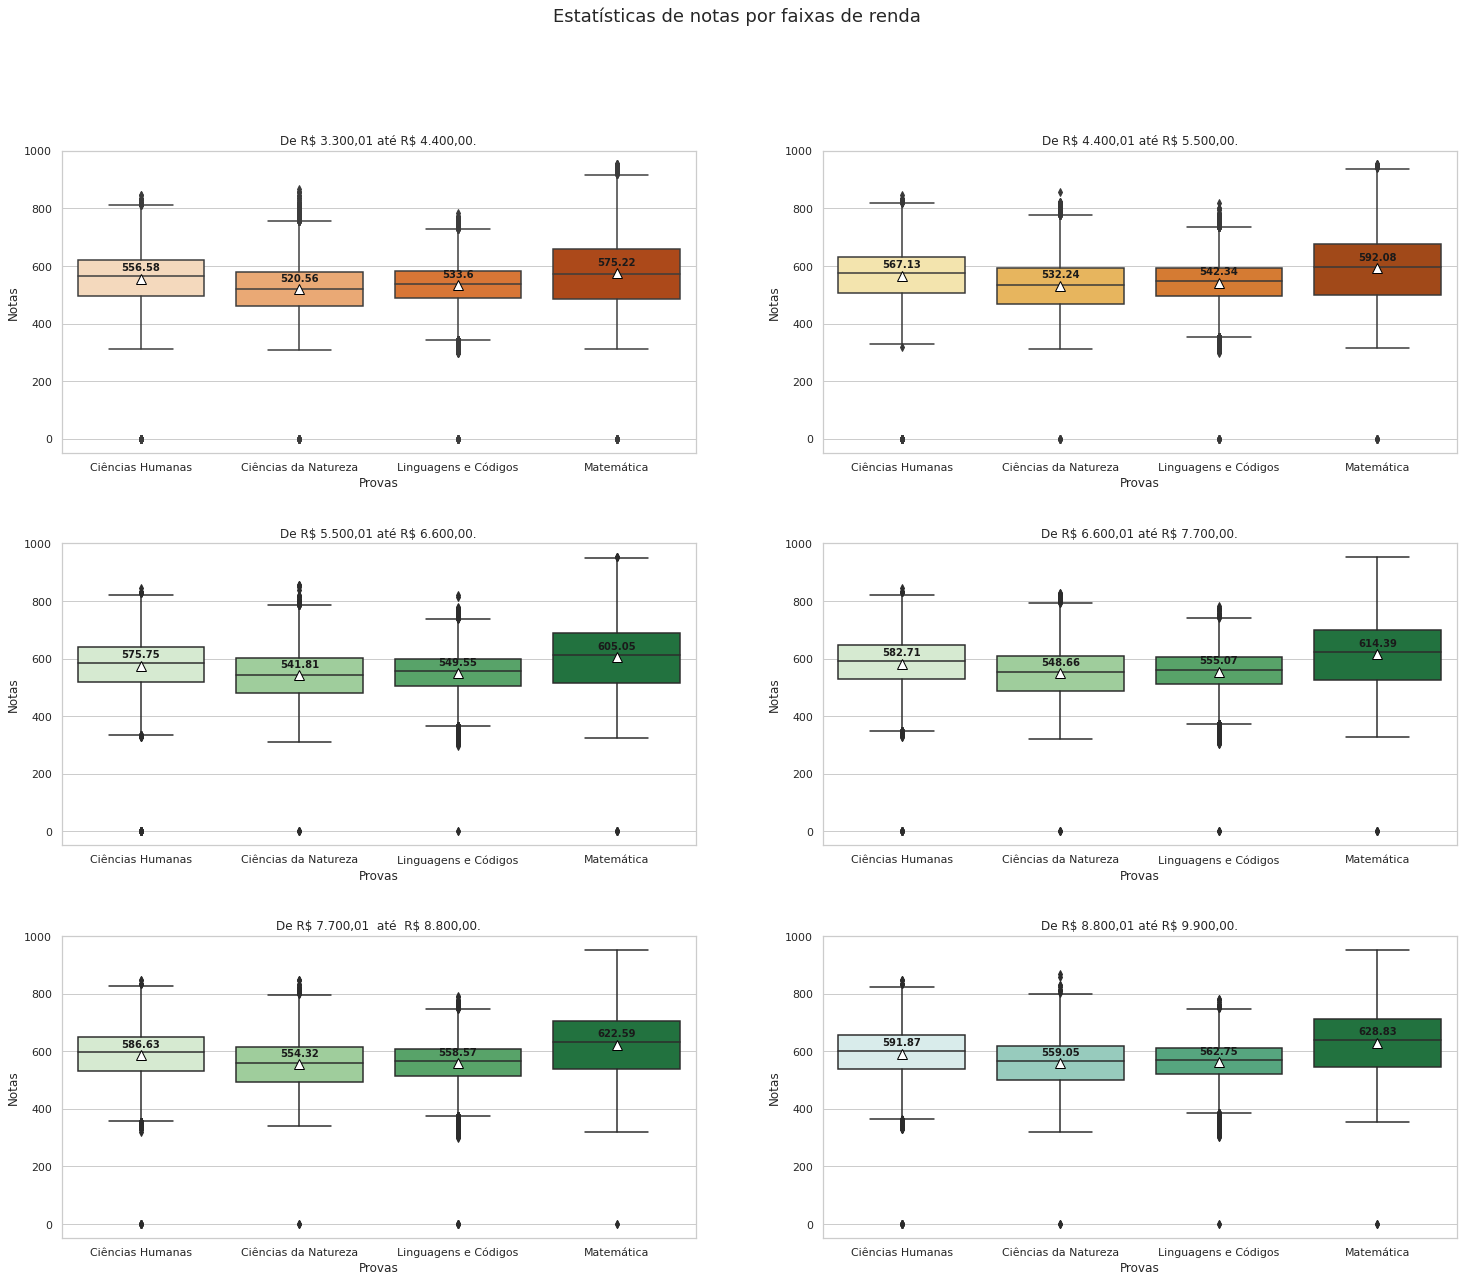

In [ ]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats

sns.set(style="whitegrid",color_codes=True)


df_G = G[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_H = H[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_I = I[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_J = J[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_K = K[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_L = L[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]



fig, ax = plt.subplots(3,2,figsize=(25, 20))
fig.suptitle('Estatísticas de notas por faixas de renda', fontsize=18)

#De R\$ 3.300,01 até R$ 4.400,00.
box_plot= sns.boxplot(x="variable", y="value", data=pd.melt(df_G),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Oranges",ax=ax[0,0])

medians = round(pd.melt(df_G).groupby(['variable'])['value'].mean(),2)
vertical_offset = pd.melt(df_G)['value'].mean() * 0.05 # offset from median for display



for xtick in box_plot.get_xticks():
   box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='k',weight='semibold')
box_plot.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 3.300,01 até R$ 4.400,00.')

# De R\$ 4.400,01 até R$ 5.500,00.
box_plot1= sns.boxplot(x="variable", y="value", data=pd.melt(df_H),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="YlOrBr",ax=ax[0,1])


medians1 = round(pd.melt(df_H).groupby(['variable'])['value'].mean(),2)
vertical_offset1 = pd.melt(df_H)['value'].mean() * (0.05) # offset from median for display



for xtick1 in box_plot1.get_xticks():
    box_plot1.text(xtick1,medians1[xtick1] + vertical_offset1,medians1[xtick1], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot1.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 4.400,01 até R$ 5.500,00.')


#De R\$ 5.500,01 até R$ 6.600,00.
box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_I),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Greens",ax=ax[1,0])


medians2 = round(pd.melt(df_I).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_I)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 5.500,01 até R$ 6.600,00.')

#De R\$ 6.600,01 até R$ 7.700,00.

box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_J),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Greens",ax=ax[1,1])


medians2 = round(pd.melt(df_J).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_J)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 6.600,01 até R$ 7.700,00.')

#De R\$ 7.700,01  até  R$ 8.800,00.

box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_K),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Greens",ax=ax[2,0])


medians2 = round(pd.melt(df_K).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_K)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 7.700,01  até  R$ 8.800,00.')


#De R\$ 8.800,01 até R$ 9.900,00.
box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_L),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="BuGn",ax=ax[2,1])


medians2 = round(pd.melt(df_L).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_L)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 8.800,01 até R$ 9.900,00.')



plt.subplots_adjust(hspace = 0.3)


 


plt.show()


In [ ]:

M = renda[(renda['Q006'] == 'De R\$ 9.900,01 até R$ 11.000,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:

N = renda[(renda['Q006'] == 'De R\$ 11.000,01 até R$ 13.200,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
O = renda[(renda['Q006'] == 'De R\$ 13.200,01 até R$ 16.500,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
P = renda[(renda['Q006'] == 'De R\$ 16.500,01 até R$ 22.000,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


In [ ]:
Q = renda[(renda['Q006'] == 'Acima de R$ 22.000,00.')&(renda['IN_TREINEIRO'] == 0) & (renda['TP_PRESENCA_CN'] == 1) & (renda['TP_PRESENCA_CH'] == 1) & (renda['TP_PRESENCA_LC'] == 1) & (renda['TP_PRESENCA_MT'] == 1) & (renda['TP_STATUS_REDACAO'] == 1)].reset_index(drop=True)


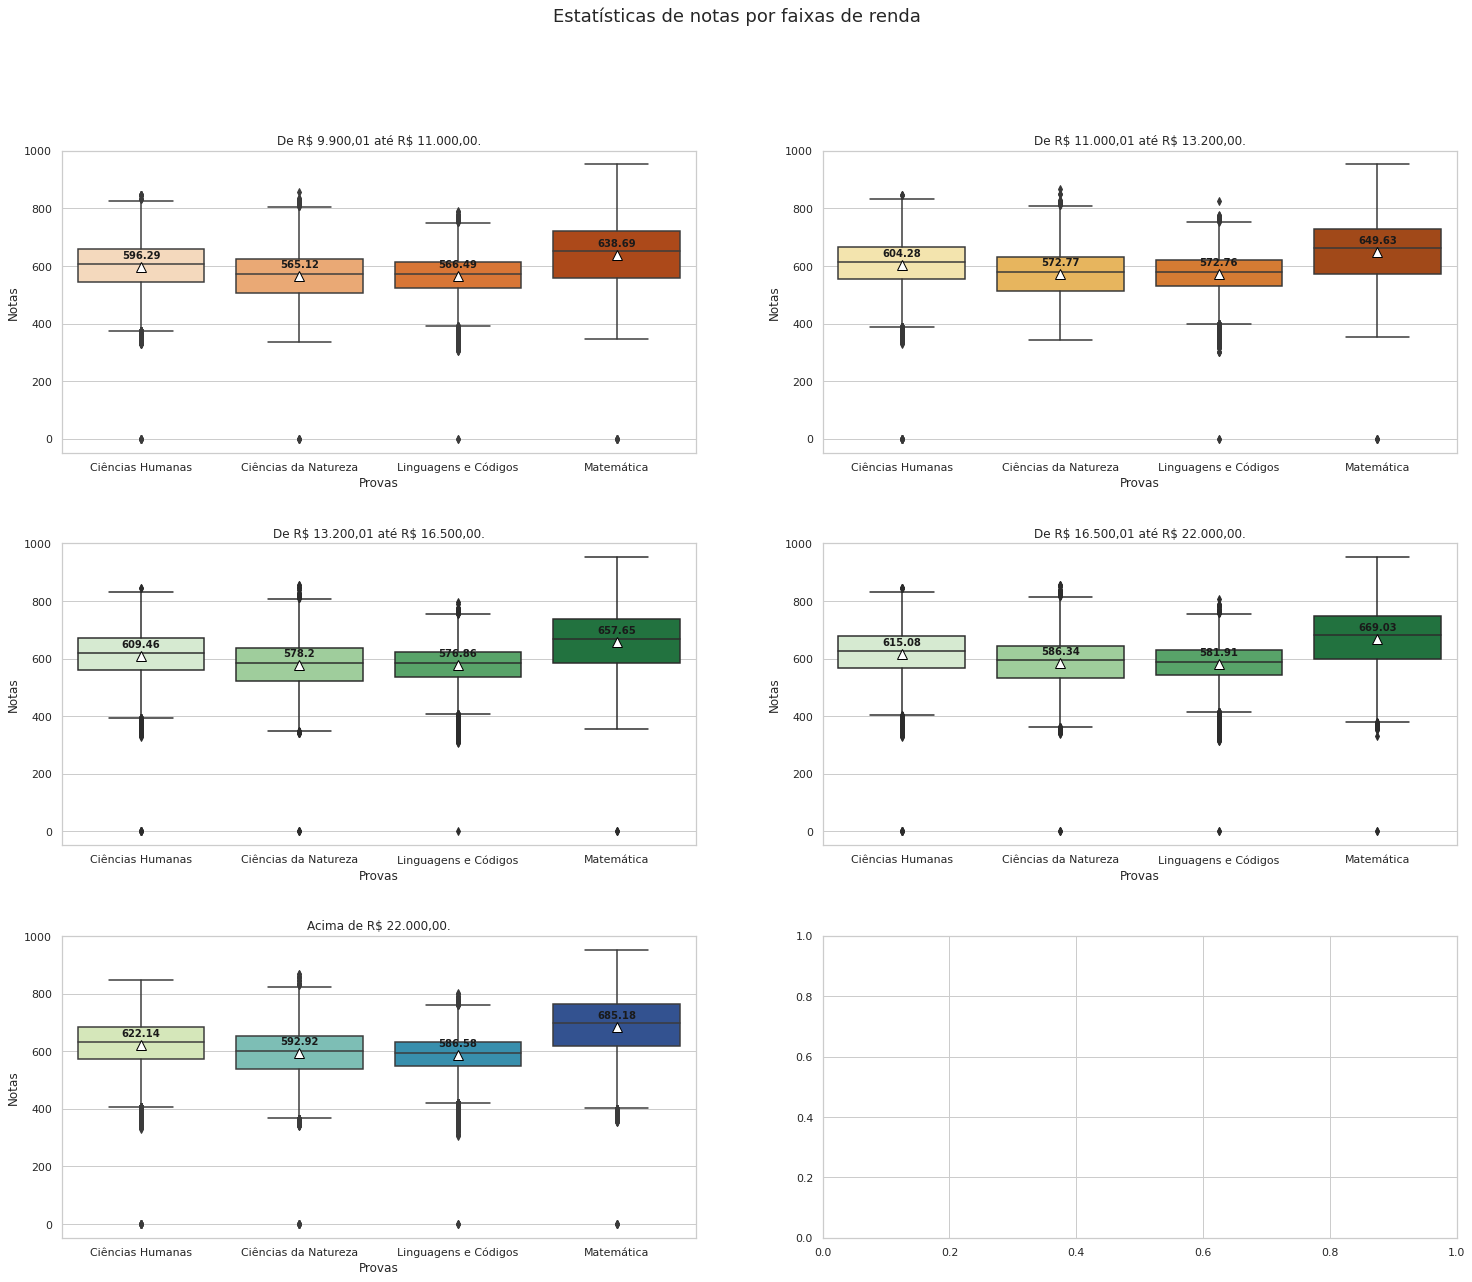

In [ ]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats

sns.set(style="whitegrid",color_codes=True)


df_M = M[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_N = N[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_O = O[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_P = P[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]
df_Q = Q[['Ciências Humanas','Ciências da Natureza', 'Linguagens e Códigos','Matemática']]




fig, ax = plt.subplots(3,2,figsize=(25, 20))
fig.suptitle('Estatísticas de notas por faixas de renda', fontsize=18)

#De R\$ 9.900,01 até R$ 11.000,00.'
box_plot= sns.boxplot(x="variable", y="value", data=pd.melt(df_M),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Oranges",ax=ax[0,0])

medians = round(pd.melt(df_M).groupby(['variable'])['value'].mean(),2)
vertical_offset = pd.melt(df_M)['value'].mean() * 0.05 # offset from median for display



for xtick in box_plot.get_xticks():
   box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='k',weight='semibold')
box_plot.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 9.900,01 até R$ 11.000,00.')

# De R\$ 11.000,01 até R$ 13.200,00.
box_plot1= sns.boxplot(x="variable", y="value", data=pd.melt(df_N),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="YlOrBr",ax=ax[0,1])


medians1 = round(pd.melt(df_N).groupby(['variable'])['value'].mean(),2)
vertical_offset1 = pd.melt(df_N)['value'].mean() * (0.05) # offset from median for display



for xtick1 in box_plot1.get_xticks():
    box_plot1.text(xtick1,medians1[xtick1] + vertical_offset1,medians1[xtick1], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot1.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 11.000,01 até R$ 13.200,00.')


#De R\$ 13.200,01 até R$ 16.500,00.
box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_O),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Greens",ax=ax[1,0])


medians2 = round(pd.melt(df_O).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_O)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 13.200,01 até R$ 16.500,00.')

#De R\$ 16.500,01 até R$ 22.000,00.

box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_P),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="Greens",ax=ax[1,1])


medians2 = round(pd.melt(df_P).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_P)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'De R\$ 16.500,01 até R$ 22.000,00.')

#Acima de R$ 22.000,00.

box_plot2= sns.boxplot(x="variable", y="value", data=pd.melt(df_Q),showmeans=True,meanprops={
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},palette="YlGnBu",ax=ax[2,0])


medians2 = round(pd.melt(df_Q).groupby(['variable'])['value'].mean(),2)
vertical_offset2 = pd.melt(df_Q)['value'].mean() * (1.05) # offset from median for display



for xtick2 in box_plot2.get_xticks():
    box_plot2.text(xtick2,medians2[xtick2] + vertical_offset1,medians2[xtick2], 
            horizontalalignment='center',size='small',color='k',weight='semibold',)
box_plot2.set(ylabel='Notas', xlabel='Provas',title = 'Acima de R$ 22.000,00.')






plt.subplots_adjust(hspace = 0.3)


 


plt.show()
